<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

### Objectives

- Analyze movie duration patterns in the 1990s.
- Identify the most popular genres and most prolific directors.
- Determine the top movie-producing countries and their output trends.
- Examine how movie durations changed over the decade.

### Key Questions

1. What was the most common movie duration in the 1990s?
2. How many action movies released in the 1990s had a runtime under 90 minutes?
3. Which genres were most popular, and who were the most prolific directors?
4. Which countries produced the highest number of movies during the 1990s?
5. How did average movie durations change over the decade?

### 0. Import Libraries
Importing the core Python libraries required for data analysis, manipulation, and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load and Inspect the Dataset

Using `pandas` to load the dataset and perform an initial inspection of its structure and contents.

In [2]:
# Load dataset
movies_df = pd.read_csv("netflix_data.csv")

# Preview the first 5 rows
display(movies_df.head())

# Inspect data structure and types
movies_df.info()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


**Understanding the Dataset**

Based on the initial inspection:

- The dataset contains **4,812 rows** and **11 columns**.
- Key columns include:
  - `type`: Indicates whether the entry is a movie or TV show.
  - `release_year`: Year the content was released.
  - `duration`: Runtime in minutes (for movies).
  - `genre`, `country`, and `director`: Categorical features.
- There are **no missing values**, and data types appear to be correctly formatted.

Since the dataset is already clean, we can proceed with **Exploratory Data Analysis (EDA)** to identify trends and insights.


In [3]:
# Shape of the df
print('Shape of movies_df:', movies_df.shape)

# Generate summary statistics
movies_df.describe()

Shape of movies_df: (4812, 11)


,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


**Summary Statistics Overview**

- **Release Year**: Movies span from **1942 to 2021**, with a noticeable concentration after 2010. The **median release year is 2016**, indicating a strong bias toward more recent titles.

- **Duration**: The **average movie length is approximately 99 minutes**, with most films falling between **88 and 116 minutes**.

- **Outliers**: A few entries have unusually short (**1 minute**) or long (**253 minutes**) durations, suggesting data variability or niche content.

> These statistics indicate that the dataset is **skewed toward recent productions** and includes a **wide range of movie lengths**, warranting visual inspection.


### 2. Visualizing the Distribution

This section explores the distribution of key numeric features to understand trends and identify potential outliers.


#### 2.1 Distribution of Release Years

A histogram to observe how movie releases are distributed across different years.

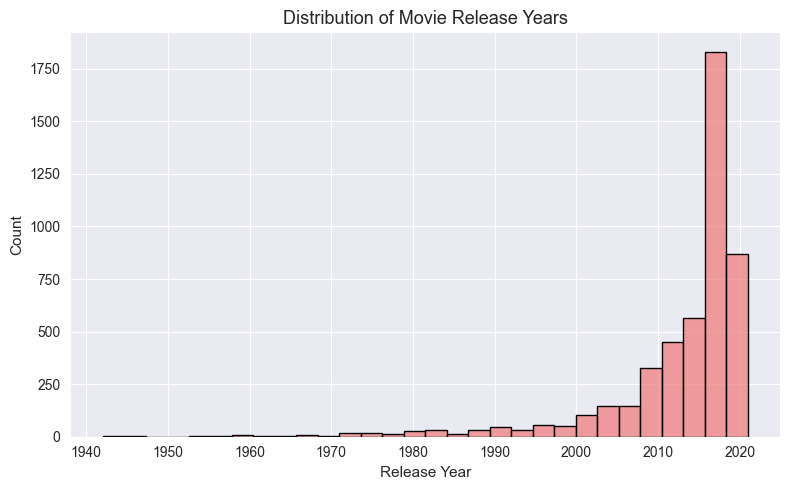

In [4]:
# Set plot style
sns.set_style('darkgrid')

# Plot: Distribution of Release Years
plt.figure(figsize=(8, 5))
sns.histplot(data=movies_df, x='release_year', bins=30, color='lightcoral', edgecolor='black')

plt.title("Distribution of Movie Release Years", fontsize=13)
plt.xlabel("Release Year", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.tight_layout()
plt.show()

**Interpretation**

- **Most movies** were released after **2000**, with a sharp increase in the **2010s**, likely reflecting Netflix’s growth and shift toward original content.
- **Peak release years** occurred in the late **2010s and early 2020s**, indicating a rise in production and content acquisition.
- **Older movies (pre-1990)** are limited in the dataset, likely due to Netflix’s catalog selection rather than overall industry output.

**Key Insight**:  
The data highlights Netflix's focus on recent content, aligning with streaming-era demand and platform-driven production strategies.


#### 2.2 Distribution of Movie Durations

A histogram to assess the spread and concentration of movie durations.


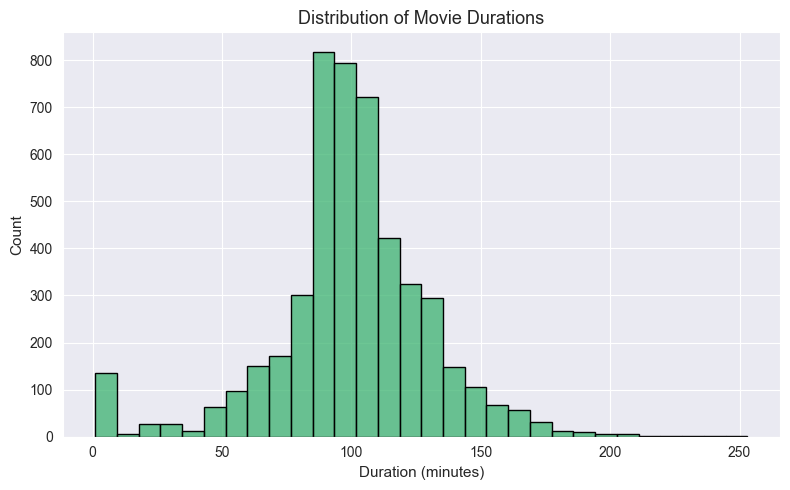

In [5]:
# Plot: Distribution of Movie Durations
plt.figure(figsize=(8, 5))
sns.histplot(data=movies_df, x='duration', bins=30, color='mediumseagreen', edgecolor='black')

plt.title('Distribution of Movie Durations', fontsize=13)
plt.xlabel('Duration (minutes)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.tight_layout()
plt.show()

**Interpretation**

- **Most movies** fall between **80 and 120 minutes**, with a concentration around **100 minutes**.
- The distribution is **right-skewed**, with a small number of movies exceeding **150 minutes**.
- **Very short films** (under **30 minutes**) may represent niche content, such as documentaries or animations.
  
Netflix movies generally conform to standard runtime expectations, with a few notable outliers at both extremes.

### 3. Filter Data for 1990s Movies

In [6]:
# Filter data for movies released in the 1990s
movies_1990s = movies_df[
    (movies_df['type'] == 'Movie') &
    (movies_df['release_year'].between(1990, 1999) )
]

# Preview few rows
display(movies_1990s.head())

# Check the shape and unique values in `release_year`
print( movies_1990s.shape)
movies_1990s['release_year'].unique()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


(183, 11)


array([1997, 1993, 1998, 1996, 1990, 1999, 1991, 1994, 1995, 1992])

**Interpretation**

- The filtered dataset includes **183 movies** from the **1990s**, specifically spanning the years **1992 to 1997**.
- This confirms that the filtering logic was applied successfully and the dataset is ready for targeted analysis.

Now, let's proceed to answer the business questions.


### 4. Answering key Questions

#### 4.1 Movie Duration Trends
- Q1: Most common duration (mode)
- Q2: Action movies under 90 minutes

The most common movie duration in the 1990s is: 94 minutes


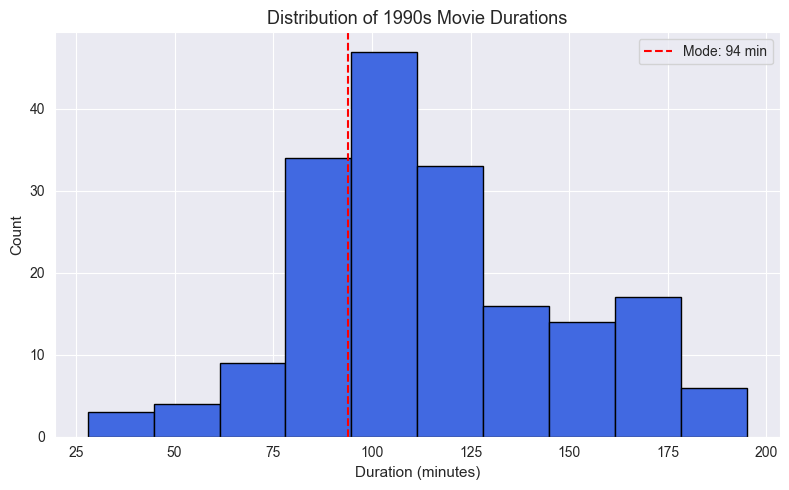

In [7]:
# Find the most frequent movie duration in the 1990s
frequent_duration = movies_1990s['duration'].mode()[0]
print(f"The most common movie duration in the 1990s is: {frequent_duration} minutes")

# Plot histogram with annotation
plt.figure(figsize=(8, 5))
plt.hist(movies_1990s['duration'], bins=10, color='royalblue', edgecolor='black')

# Highlight the mode duration
plt.axvline(x=frequent_duration, color='red', linestyle='--', label=f'Mode: {frequent_duration} min')

plt.title("Distribution of 1990s Movie Durations", fontsize=13)
plt.xlabel("Duration (minutes)", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.legend()
plt.tight_layout()
plt.show()


**Q1: What was the most common movie duration in the 1990s?**

The most frequent movie duration was **94 minutes**. This duration aligns with industry norms and appears as a clear peak in the distribution.

The red dashed line in the plot highlights this mode.


In [8]:
# Filter for action movies under 90 minutes
short_movie = movies_1990s[
    (movies_1990s['genre'] == 'Action') &
    (movies_1990s['duration'] < 90)
]

# Count the number of matching movies
short_movie_count = short_movie.shape[0]

print(f"Number of action movies under 90 minutes in the 1990s: {short_movie_count}")

Number of action movies under 90 minutes in the 1990s: 7


#### 4.2 Genre and Director Popularity
- Q3: Top genres and most prolific directors

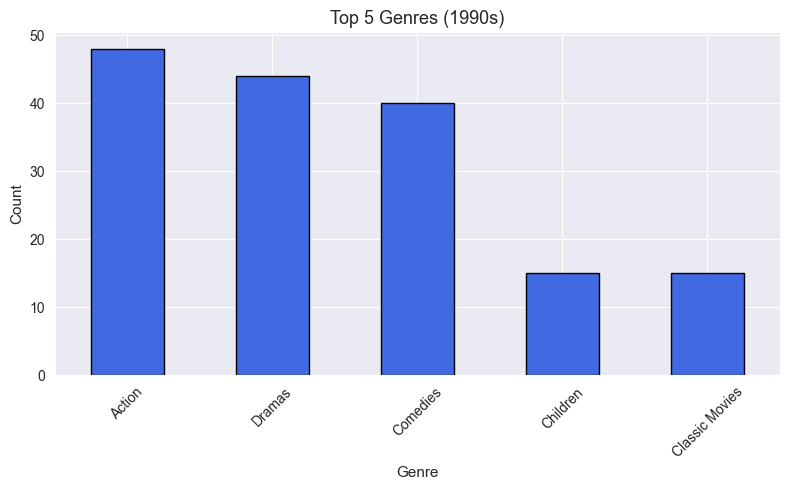

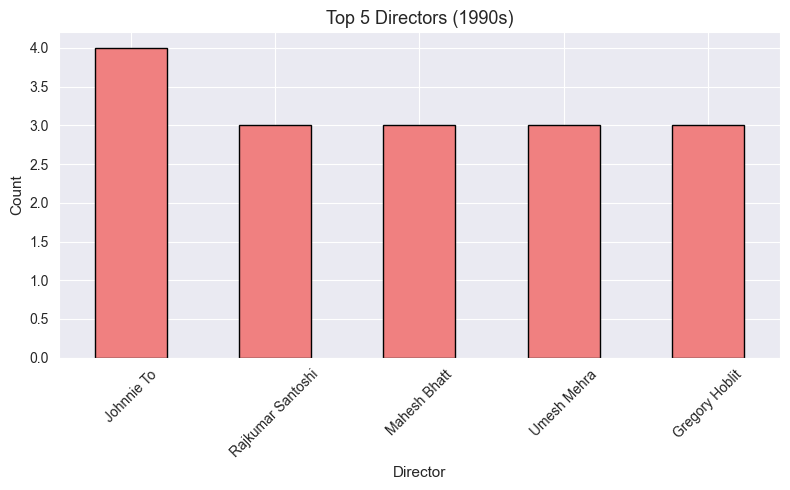

In [9]:
# Most popular genres (top 5)
top_genres = movies_1990s["genre"].value_counts().head()

# Most prolific directors (top 5)
top_directors = movies_1990s["director"].value_counts().head()

plt.figure(figsize=(8, 5))
top_genres.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Top 5 Genres (1990s)", fontsize=13)
plt.xlabel("Genre", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
top_directors.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 5 Directors (1990s)", fontsize=13)
plt.xlabel("Director", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**

The bar charts reveal notable trends in **1990s cinema**:

- **Top Genres**: Action, Drama, and Comedy were the most dominant, with **Action** leading overall. This points to a broad audience interest in high-energy, emotionally engaging films.
  
- **Prolific Directors**: **Johnnie To** emerged as the most active director during the decade, followed by **Youssef Chahine** and **Umesh Mehra**, reflecting strong regional contributions to global cinema.

These patterns suggest a clear audience preference for **thrilling and dramatic storytelling**, driven in part by a small group of highly productive directors who helped shape the decade’s content landscape.


#### 4.3 Country-Level Production
- Q4: Top movie-producing countries

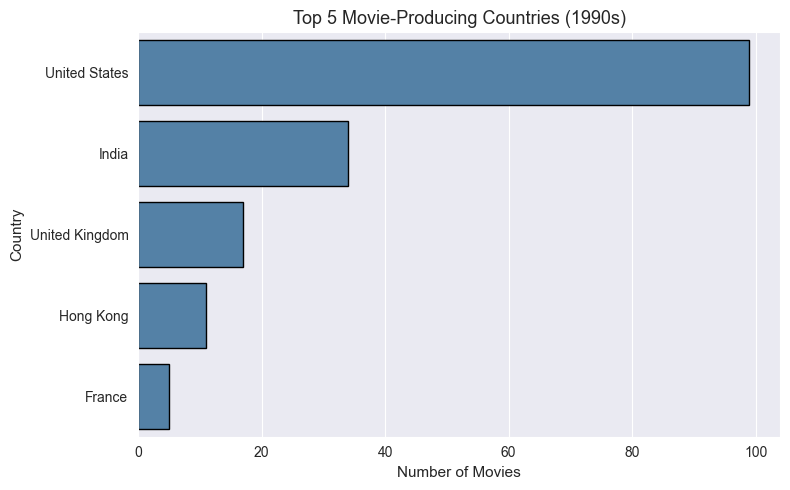

In [10]:
# Get top 5 countries by movie count
top_countries = movies_1990s['country'].value_counts().head().reset_index()
top_countries.columns = ['Country', 'Count']

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=top_countries, y='Country', x='Count', color='steelblue', edgecolor='black')

plt.title("Top 5 Movie-Producing Countries (1990s)", fontsize=13)
plt.xlabel("Number of Movies", fontsize=11)
plt.ylabel("Country", fontsize=11)
plt.tight_layout()
plt.show()

**Interpretation**

The bar chart displays the **top five movie-producing countries** in the 1990s. The **United States** led by a wide margin, reflecting its dominant role in global film production. **India** and the **United Kingdom** followed, though with significantly fewer titles. **Hong Kong** and **France** also featured, contributing a modest share.

These figures highlight the **major contributors to the global film industry** during the decade, with the U.S. clearly driving most of the content available on platforms like Netflix.


#### 4.4 Duration Trend Over Time
- Q5: Line plot of average duration by year

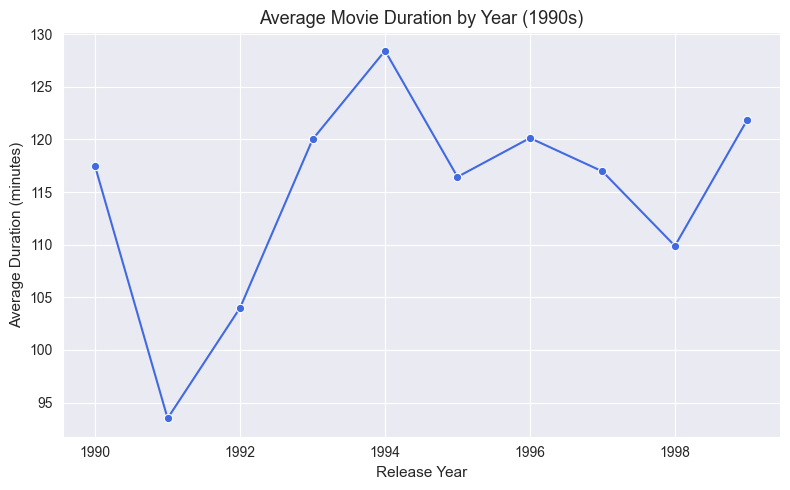

In [11]:
# Calculate average duration per release year
average_duration = movies_1990s.groupby('release_year')['duration'].mean()

# Plot the trend
plt.figure(figsize=(8, 5))
sns.lineplot(x=average_duration.index, y=average_duration.values, color='royalblue', marker='o')

plt.title('Average Movie Duration by Year (1990s)', fontsize=13)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Average Duration (minutes)', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**

Average movie durations in the 1990s **went up and down**, without a clear trend.

- The **shortest** average was in **1991** (~94 mins), and the **longest** in **1994** (~129 mins).
- Durations were fairly steady from **1995 to 1997**, dropped in **1998**, and rose again in **1999**.

This shows that movie lengths changed from year to year, likely due to different production and storytelling choices.


### 5. Key Findings

#### 1. Most Frequent Movie Duration  
The most common duration was **94 minutes**, showing a preference for standard-length films.

#### 2. Short Action Movies  
Only **7 action movies** were under 90 minutes, suggesting most were longer.

#### 3. Popular Genres and Directors  
- **Top Genres:** Action, Drama, Comedy  
- **Top Directors:** Johnnie To, Youssef Chahine, Umesh Mehra  

This reflects a strong audience interest in thrilling and emotional stories.

#### 4. Top Movie-Producing Countries  
The **United States** led by far, followed by **India**, **UK**, **Hong Kong**, and **France** — highlighting global industry contributions.

#### 5. Movie Duration Trends  
Durations **fluctuated throughout the decade**:
- Drop in **1991** (~94 mins)
- Peak in **1994** (~130 mins)
- Variations continued through **1999**

This shows that runtimes were shaped by content needs, not fixed standards.


### 6. Conclusion

This analysis of Netflix's 1990s movie catalog reveals clear patterns in genre popularity, film production, and runtime trends.

- **Action** was the most popular genre.
- The **U.S.** dominated movie production.
- A few directors played a major role in shaping the decade.
- Movie durations varied, reflecting changing storytelling needs.

#### Future Exploration  
Further analysis could explore:
- How trends evolved after 2000  
- The impact of streaming on genres and runtimes  
- Predictive models for genre or production trends

This study offers a snapshot of 1990s movies and a foundation for deeper industry insights.